In [14]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set_context('paper', font_scale=2)

In [2]:
x = pd.DataFrame([[1,2,3], [3,4,5], [9,7,9]])

In [38]:
# Read in the data from the Excel spreadsheet. 
d = pd.read_excel(io='data/Proteomics Un and Sat Fat Heatmaps Data Analysis Panels.xlsx',
                  sheetname='Fatty Acid', header=None)

# The data is messy. Initial cleaning:
# Select columns that contain the relevant data
d = d[[21,25,26,27]]
# Set column names to a second row in the current data
d.columns = d.ix[1,:]
# Remove missing data (na)
d = d.ix[2:,:].dropna()
# Set the row names (index) to gene names
d = d.set_index(keys='Gene name', drop=True)

# This is mostly cosmetic, but will show up in plots. Name the index and columns:
d.columns.names = ['variable']
d.index.names = ['gene']

# For each column in the dataset, change the variable type to float,
# so that the program treats them as numbers
# d[c] returns the column with column name == c
for c in d.columns:
    d[c] = d[c].astype(float)

# Sort the dataset according to values in th column 'HFD'
d = d.sort_values(by='HFD', ascending=False)

In [39]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Acox1 to Acot13
Data columns (total 3 columns):
LFD    30 non-null float64
SFD    30 non-null float64
HFD    30 non-null float64
dtypes: float64(3)
memory usage: 960.0+ bytes


In [40]:
d

variable,LFD,SFD,HFD
gene,,,
Acox1,0.0,14.648063,126.685547
Acad11,0.0,-24.686184,49.644887
Hsd17b4,0.0,23.664884,33.893874
Acsl1,0.0,42.270700,23.525688
Cd36,0.0,-7.497351,8.154473
Cpt2,0.0,1.866005,5.850907
Ech1,0.0,-19.112419,5.733734
Acadv,0.0,0.791227,4.008306
Acadm,0.0,29.180182,2.933231


/home/perza/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


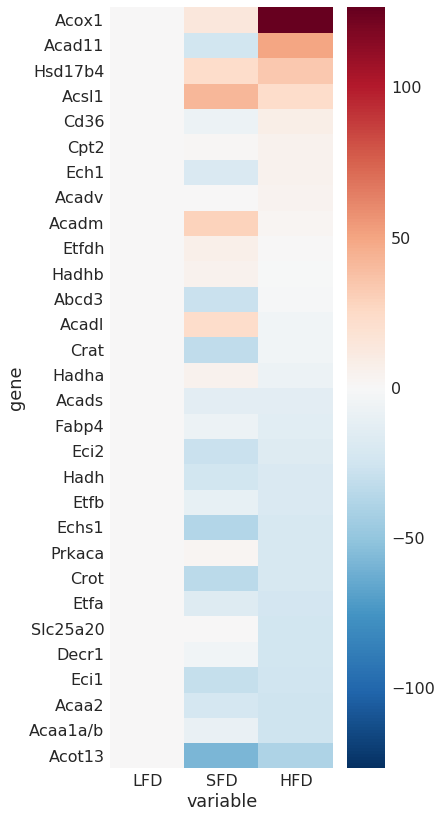

In [41]:
plt.figure(figsize=(5,14));
sns.heatmap(d)#, square=True)